In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = "../data/btc_cadli_hourly_with_indicators_labeled.csv"
df = pd.read_csv(data_path, parse_dates=["datetime"])
df = df.sort_values("datetime").reset_index(drop=True)

df.head()


,datetime,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_VOLUME,log_return_1h,abs_return_1h,vol_6h,...,vol_24h,volume_change,volume_ma_24h,volume_ratio,rsi_14,macd,macd_signal,future_max_abs_return_h,spike,spike_direction
0,2021-01-02 00:00:00+00:00,29389.321346,29389.321346,29067.501756,29268.504707,15368.922970,4.492050e+08,-0.004119,0.004119,0.003801,...,0.004640,0.811693,14534.907381,1.057380,49.552433,35.803191,38.981817,NaN,0,0
1,2021-01-02 01:00:00+00:00,29268.504707,29461.652482,29194.623983,29440.878366,11417.678832,3.351550e+08,0.005872,0.005872,0.004222,...,0.003952,-0.257093,13669.933370,0.835240,52.708448,46.206380,40.426729,NaN,0,0
2,2021-01-02 02:00:00+00:00,29440.878366,29525.466150,29408.515075,29408.515075,13416.111517,3.952869e+08,-0.001100,0.001100,0.003648,...,0.003704,0.175030,13609.630764,0.985781,53.142877,51.248770,42.591137,0.005872,0,0
3,2021-01-02 03:00:00+00:00,29408.515075,29443.292134,29346.354661,29417.416667,7613.619776,2.238166e+08,0.000303,0.000303,0.003442,...,0.003662,-0.432502,13452.151168,0.565978,46.023654,55.325428,45.137995,0.001100,0,0
4,2021-01-02 04:00:00+00:00,29417.416667,29452.197364,29321.110879,29426.104305,7915.145777,2.326149e+08,0.000295,0.000295,0.003316,...,0.003634,0.039604,13269.135400,0.596508,51.351954,58.581932,47.826783,0.007232,0,0


In [2]:
print("Date range:")
print(df["datetime"].min(), "→", df["datetime"].max())

print("\nTotal rows:", len(df))

print("\nSpike count:")
print(df["spike"].value_counts())

print("\nSpike rate:")
print(df["spike"].mean())


Date range:
2021-01-02 00:00:00+00:00 → 2024-12-30 21:00:00+00:00

Total rows: 35005

Spike count:
spike
0    34201
1      804
Name: count, dtype: int64

Spike rate:
0.022968147407513212


In [3]:
df[df["spike"] == 1]["spike_direction"].value_counts()


spike_direction
 1    416
-1    388
Name: count, dtype: int64

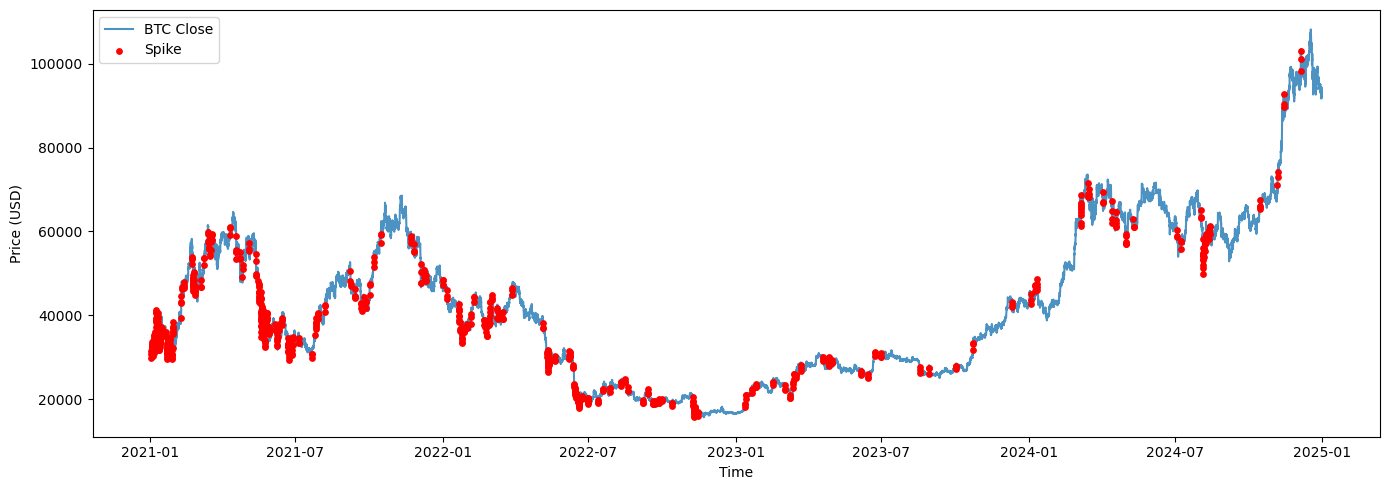

In [4]:
plt.figure(figsize=(14,5))

plt.plot(df["datetime"], df["CLOSE"], label="BTC Close", alpha=0.8)

spikes = df[df["spike"] == 1]
plt.scatter(
    spikes["datetime"],
    spikes["CLOSE"],
    color="red",
    s=15,
    label="Spike",
    zorder=3
)

plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


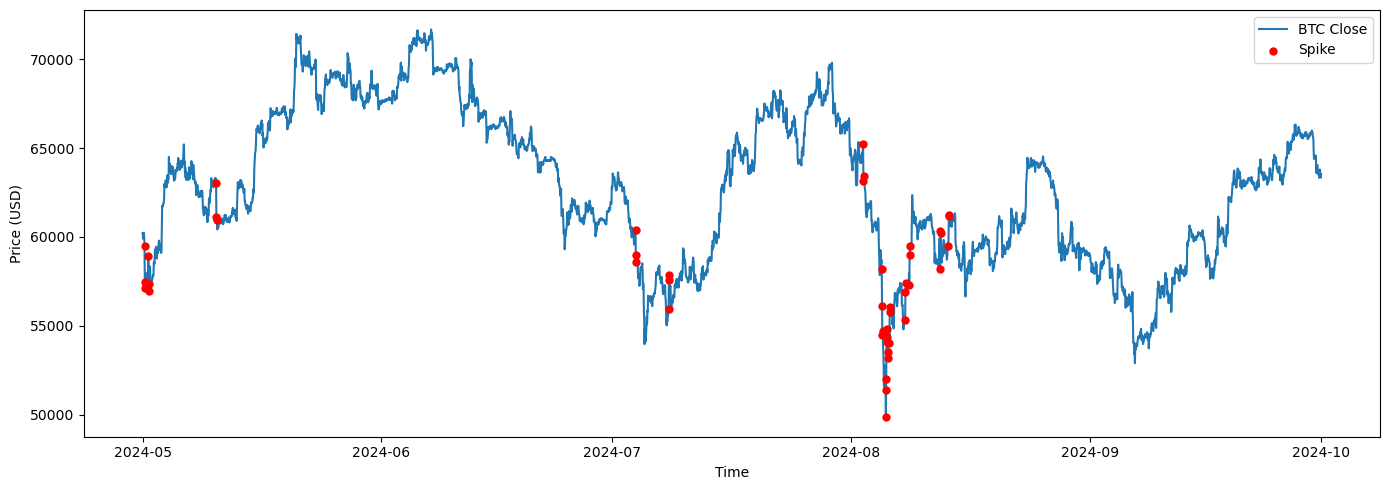

In [5]:
start = "2024-05-01"
end = "2024-10-01"

zoom_df = df[(df["datetime"] >= start) & (df["datetime"] <= end)]

plt.figure(figsize=(14,5))

plt.plot(
    zoom_df["datetime"],
    zoom_df["CLOSE"],
    label="BTC Close",
    linewidth=1.5
)

spikes = zoom_df[zoom_df["spike"] == 1]
plt.scatter(
    spikes["datetime"],
    spikes["CLOSE"],
    color="red",
    s=25,
    label="Spike",
    zorder=3
)

plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


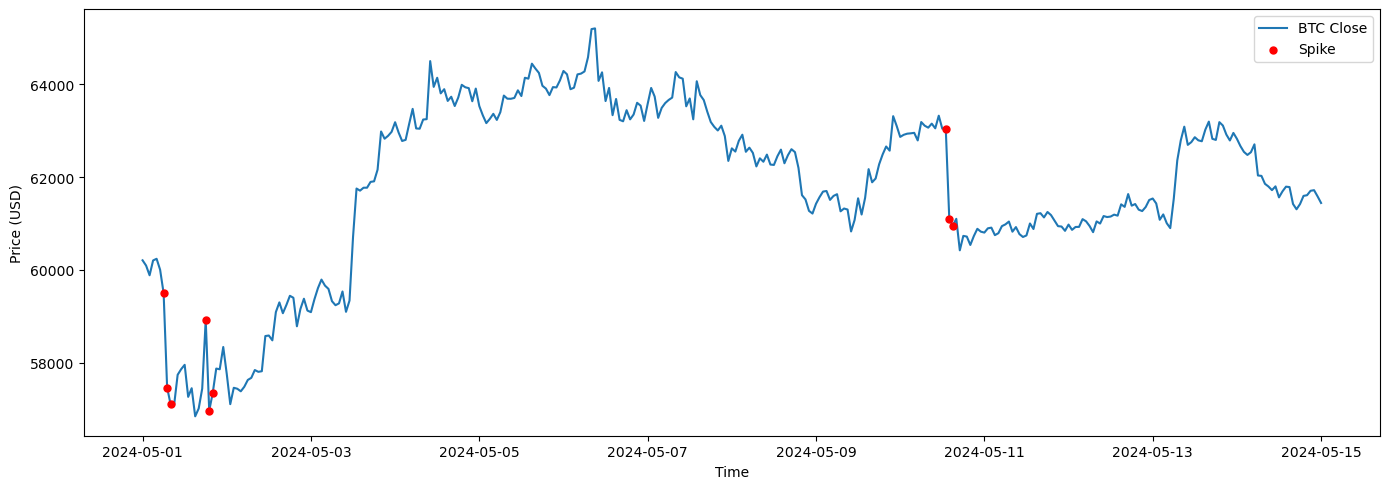

In [6]:
start = "2024-05-01"
end = "2024-05-15"

zoom_df = df[(df["datetime"] >= start) & (df["datetime"] <= end)]

plt.figure(figsize=(14,5))

plt.plot(
    zoom_df["datetime"],
    zoom_df["CLOSE"],
    label="BTC Close",
    linewidth=1.5
)

spikes = zoom_df[zoom_df["spike"] == 1]
plt.scatter(
    spikes["datetime"],
    spikes["CLOSE"],
    color="red",
    s=25,
    label="Spike",
    zorder=3
)

plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
## Noticed that spikes come in sets of 3- this means the label is attached to the warning time, not the moment of the price jump. 

## Will need to further adjust spikes in proprocessing step, perhaps research as what we should consider a 'spike'.